In [58]:
### Making the dataset long format for analysis

import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("all_data_twotasks.csv")
df_long = pd.melt(
    df,
    id_vars=['subject', 'cnd'],
    value_vars=['d1', 'd5'],
    var_name='score_time',
    value_name='score'
)

subjects_per_group = df_long.groupby('cnd')['subject'].nunique()
print(subjects_per_group)

cnd
Control         10
Full            10
Reactivation    10
Name: subject, dtype: int64


In [59]:
### for later if we want to compare d2 and d5 scores in the full training group

df = pd.read_csv("all_data_twotasks.csv")
df_long_day2 = pd.melt(
    df,
    id_vars=['subject', 'cnd'],
    value_vars=['d2', 'd5'],
    var_name='score_time',
    value_name='score'
)

In [25]:
### Perform one-way ANOVA on day 1 scores to see if there are significant differences between conditions

from statsmodels.formula.api import ols

# Filter data for day 1 scores only
df_d1 = df_long[df_long['score_time'] == 'd1']

model = ols('score ~ cnd', data=df_d1).fit()
anova_table = sm.stats.anova_lm(model, typ=2) 

print(anova_table)


                 sum_sq    df         F    PR(>F)
cnd         1563.674069   2.0  0.094335  0.910277
Residual  223773.090653  27.0       NaN       NaN


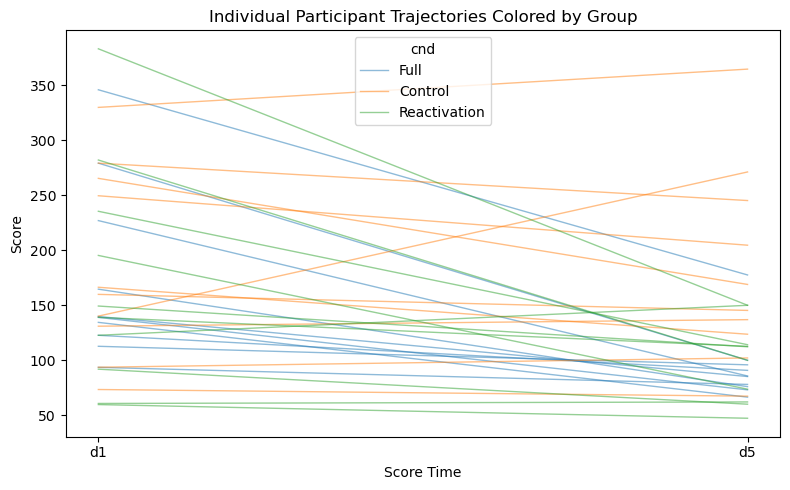

In [28]:
### checking individual participant trajectories colored by group
import seaborn as sns

plt.figure(figsize=(8, 5))

sns.lineplot(
    data=df_long,
    x="score_time",
    y="score",
    hue="cnd",         
    units="subject",    
    estimator=None,     
    alpha=0.5,
    lw=1
)

plt.title("Individual Participant Trajectories Colored by Group")
plt.xlabel("Score Time")
plt.ylabel("Score")
plt.tight_layout()
plt.show()


                        Mixed Linear Model Regression Results
Model:                      MixedLM           Dependent Variable:           score    
No. Observations:           60                Method:                       REML     
No. Groups:                 30                Scale:                        1574.7296
Min. group size:            2                 Log-Likelihood:               -308.1763
Max. group size:            2                 Converged:                    Yes      
Mean group size:            2.0                                                      
-------------------------------------------------------------------------------------
                                       Coef.   Std.Err.   z    P>|z|  [0.025   0.975]
-------------------------------------------------------------------------------------
Intercept                              188.774   28.789  6.557 0.000  132.349 245.199
score_time[T.d5]                        -5.843   22.113 -0.264 0.792  -49.184 

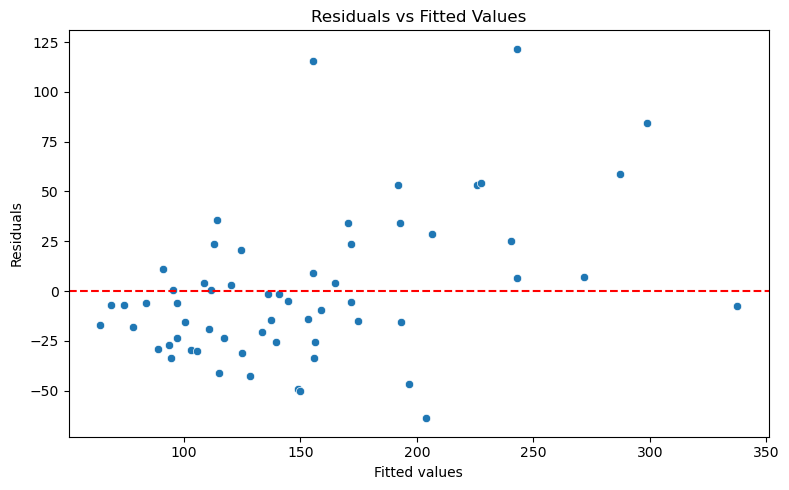

In [60]:
# Set 'Full' as the reference group for cnd and make LMM
df_long['cnd'] = pd.Categorical(df_long['cnd'], categories=['Control', 'Full','Reactivation'])

# Fit linear mixed model: random intercept and random slope for score_time per subject
model = smf.mixedlm(
    "score ~ score_time * cnd",
    data=df_long,
    groups=df_long["subject"],
    re_formula="~score_time"
)
result = model.fit()
print(result.summary())

model = smf.mixedlm(
    "score ~ score_time",
    data=df_long,
    groups=df_long["subject"],
    re_formula="~score_time"
)
result = model.fit()
print(result.summary())

# Get fitted values and residuals
df_long['fitted'] = result.fittedvalues
df_long['residuals'] = result.resid

# Plot residuals vs fitted values
plt.figure(figsize=(8, 5))
sns.scatterplot(x='fitted', y='residuals', data=df_long)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.tight_layout()
plt.show()



                     Mixed Linear Model Regression Results
Model:                     MixedLM         Dependent Variable:         score    
No. Observations:          60              Method:                     REML     
No. Groups:                30              Scale:                      1574.7296
Min. group size:           2               Log-Likelihood:             -308.1763
Max. group size:           2               Converged:                  Yes      
Mean group size:           2.0                                                  
--------------------------------------------------------------------------------
                                  Coef.   Std.Err.   z    P>|z|  [0.025   0.975]
--------------------------------------------------------------------------------
Intercept                         171.870   28.789  5.970 0.000  115.445 228.295
score_time[T.d5]                  -73.670   22.113 -3.331 0.001 -117.012 -30.329
cnd[T.Control]                     16.904   40.713

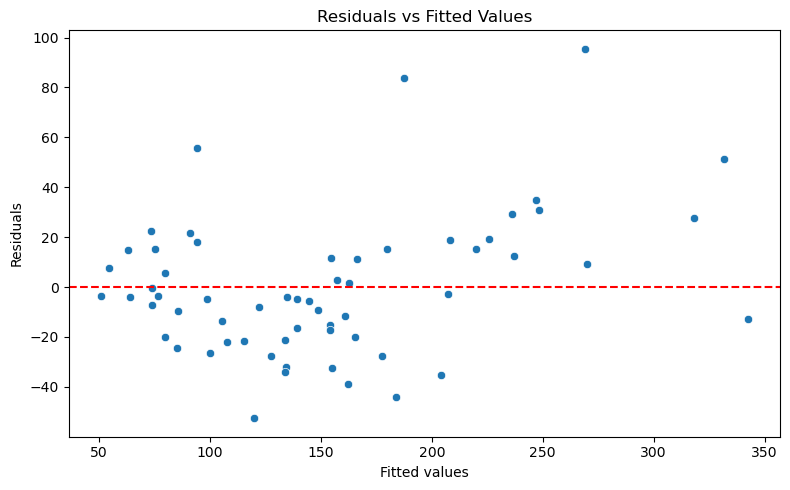

In [30]:
# Set 'Full' as the reference group to see if Full and Reactivation differ
df_long['cnd'] = pd.Categorical(df_long['cnd'], categories=['Reactivation','Control', 'Full'])

# Fit linear mixed model: random intercept and random slope for score_time per subject
model = smf.mixedlm(
    "score ~ score_time * cnd",
    data=df_long,
    groups=df_long["subject"],
    re_formula="~score_time"
)
result = model.fit()
print(result.summary())

# Get fitted values and residuals
df_long['fitted'] = result.fittedvalues
df_long['residuals'] = result.resid

# Plot residuals vs fitted values
plt.figure(figsize=(8, 5))
sns.scatterplot(x='fitted', y='residuals', data=df_long)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.tight_layout()
plt.show()



                     Mixed Linear Model Regression Results
Model:                     MixedLM         Dependent Variable:         score    
No. Observations:          60              Method:                     REML     
No. Groups:                30              Scale:                      1574.7296
Min. group size:           2               Log-Likelihood:             -308.1763
Max. group size:           2               Converged:                  Yes      
Mean group size:           2.0                                                  
--------------------------------------------------------------------------------
                                  Coef.   Std.Err.   z    P>|z|  [0.025   0.975]
--------------------------------------------------------------------------------
Intercept                         171.870   28.789  5.970 0.000  115.445 228.295
score_time[T.d5]                  -73.670   22.113 -3.331 0.001 -117.012 -30.329
cnd[T.Full]                         3.954   40.713

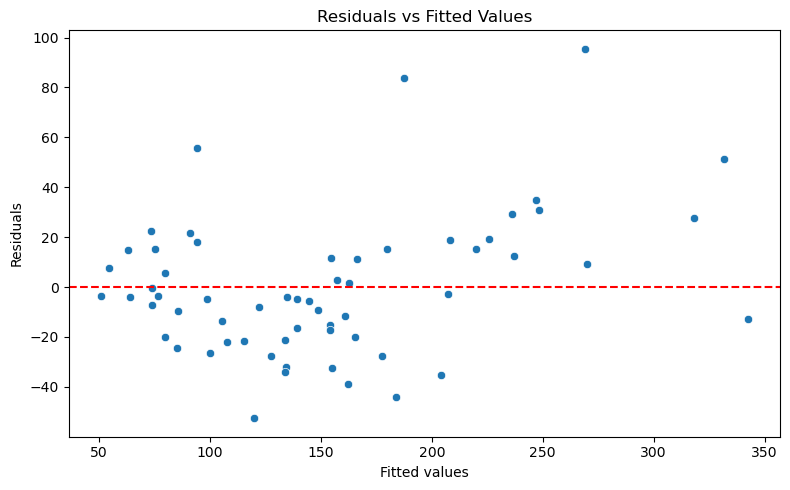

In [33]:
##Reactivation as reference group only to look at the learning effect (day5 vs day1) in the reactivation group

df_long['cnd'] = pd.Categorical(df_long['cnd'], categories=['Reactivation', 'Full', 'Control'])

# Fit linear mixed model: random intercept and random slope for score_time per subject
model = smf.mixedlm(
    "score ~ score_time * cnd",
    data=df_long,
    groups=df_long["subject"],
    re_formula="~score_time"
)
result = model.fit()
print(result.summary())

# Get fitted values and residuals
df_long['fitted'] = result.fittedvalues
df_long['residuals'] = result.resid

# Plot residuals vs fitted values
plt.figure(figsize=(8, 5))
sns.scatterplot(x='fitted', y='residuals', data=df_long)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.tight_layout()
plt.show()

    subject   cnd score_time       score
0         3  Full         d2  100.927494
1         4  Full         d2  217.783002
2         5  Full         d2  133.860750
6        12  Full         d2  287.473587
7        13  Full         d2  103.939945
8        14  Full         d2   91.994242
18       36  Full         d2   84.329505
19       39  Full         d2  103.644081
22       42  Full         d2  122.676808
24       44  Full         d2  106.990645
                   Mixed Linear Model Regression Results
Model:                    MixedLM        Dependent Variable:        score   
No. Observations:         20             Method:                    REML    
No. Groups:               10             Scale:                     208.1731
Min. group size:          2              Log-Likelihood:            -93.1167
Max. group size:          2              Converged:                 No      
Mean group size:          2.0                                               
------------------------------

/var/folders/b0/lql08qjj4gz4nxl4zqz30lsm0000gn/T/ipykernel_94046/1735411633.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full['score_time'] = pd.Categorical(df_full['score_time'], categories=['d2', 'd5'])
/opt/homebrew/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/anaconda3/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood o

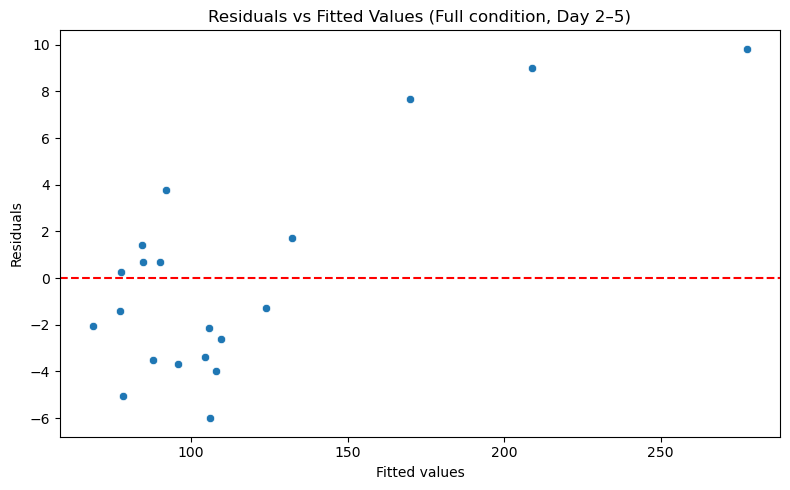

In [34]:
### Do the day 2 versus day 5 scores in the full training group differ?
df_full = df_long_day2[(df_long_day2['cnd'] == 'Full') & (df_long_day2['score_time'].isin(['d2', 'd5']))]

print(df_long_day2[(df_long_day2['cnd'] == 'Full') & (df_long_day2['score_time'] == 'd2')])



# Ensure categorical ordering if needed
df_full['score_time'] = pd.Categorical(df_full['score_time'], categories=['d2', 'd5'])

# Fit LMM: random intercept and slope for Time per subject
model = smf.mixedlm(
    "score ~ score_time",
    data=df_full,
    groups=df_full["subject"],
    re_formula="~score_time"
)
result = model.fit()
print(result.summary())

# Add fitted and residuals to dataframe
df_full['fitted'] = result.fittedvalues
df_full['residuals'] = result.resid

# Plot residuals vs fitted values
plt.figure(figsize=(8, 5))
sns.scatterplot(x='fitted', y='residuals', data=df_full)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values (Full condition, Day 2–5)')
plt.tight_layout()
plt.show()


In [37]:
### Correlation between d5 scores and the percentage correction on 15 reminder trials in Reactivation group

df = pd.read_csv("all_data_twotasks.csv")
df_reactivation = df[df['cnd'] == 'Reactivation'].dropna(subset=['d5', 'reac_corr'])
corr_coef, p_value = pearsonr(df_reactivation['d5'], df_reactivation['reac_corr'])

print(f"Correlation between d5 scores and reac_corr in Reactivation group:")
print(f"r = {corr_coef:.3f}, p = {p_value:.3f}")


Correlation between d5 scores and reac_corr in Reactivation group:
r = 0.143, p = 0.714


Now looking at the transfer data

In [56]:
### Making the dataset now for transfer analysis

import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("all_data_twotasks.csv")
df_long_transfer = pd.melt(
    df,
    id_vars=['subject', 'cnd'],
    value_vars=['d5', 'Transfer'],
    var_name='score_time',
    value_name='score'
)

subjects_per_group = df_long.groupby('cnd')['subject'].nunique()
print(subjects_per_group)

cnd
Control         10
Full            10
Reactivation    10
Name: subject, dtype: int64


/var/folders/b0/lql08qjj4gz4nxl4zqz30lsm0000gn/T/ipykernel_94046/2735997775.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  subjects_per_group = df_long.groupby('cnd')['subject'].nunique()


In [57]:
# Identify subjects with missing Transfer
subjects_with_missing_transfer = df.loc[df['Transfer'].isna(), 'subject'].unique()

# Exclude all data for those subjects from df_long
df_long_clean = df_long_transfer[~df_long['subject'].isin(subjects_with_missing_transfer)].copy()
df_long_clean['cnd'] = pd.Categorical(df_long_clean['cnd'], categories=['Reactivation', 'Full', 'Control'])
subjects_per_cnd = df_long_clean.groupby('cnd')['subject'].nunique()
print("Number of subjects per condition after excluding missing Transfer:")
# Ensure score_time is a categorical variable with the right order: d5 as reference
df_long_clean['score_time'] = pd.Categorical(df_long_clean['score_time'], categories=['d5', 'Transfer'])

# Filter only Reactivation condition
df_reactivation = df_long_clean[df_long_clean['cnd'] == 'Reactivation'].copy()

# Ensure score_time has the correct order
df_reactivation['score_time'] = pd.Categorical(df_reactivation['score_time'], categories=['d5', 'Transfer'])

# Fit model: change over time in Reactivation group only (random intercept per subject)
model = smf.mixedlm(
    "score ~ score_time",
    data=df_reactivation,
    groups=df_reactivation["subject"]
)
result = model.fit()
print(result.summary())

# Filter only Reactivation condition
df_reactivation = df_long_clean[df_long_clean['cnd'] == 'Full'].copy()

# Ensure score_time has the correct order
df_reactivation['score_time'] = pd.Categorical(df_reactivation['score_time'], categories=['d5', 'Transfer'])

# Fit model: change over time in Reactivation group only (random intercept per subject)
model = smf.mixedlm(
    "score ~ score_time",
    data=df_reactivation,
    groups=df_reactivation["subject"]
)
result = model.fit()
print(result.summary())

# Filter only Reactivation condition
df_reactivation = df_long_clean[df_long_clean['cnd'] == 'Control'].copy()

# Ensure score_time has the correct order
df_reactivation['score_time'] = pd.Categorical(df_reactivation['score_time'], categories=['d5', 'Transfer'])

# Fit model: change over time in Reactivation group only (random intercept per subject)
model = smf.mixedlm(
    "score ~ score_time",
    data=df_reactivation,
    groups=df_reactivation["subject"]
)
result = model.fit()
print(result.summary())



Number of subjects per condition after excluding missing Transfer:
               Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     score    
No. Observations:     16          Method:                 REML     
No. Groups:           8           Scale:                  3268.8277
Min. group size:      2           Log-Likelihood:         -81.7134 
Max. group size:      2           Converged:              Yes      
Mean group size:      2.0                                          
-------------------------------------------------------------------
                        Coef.   Std.Err.   z   P>|z| [0.025  0.975]
-------------------------------------------------------------------
Intercept                94.790   26.514 3.575 0.000 42.823 146.757
score_time[T.Transfer]   62.610   28.587 2.190 0.029  6.581 118.639
Group Var              2355.260   52.750                           

               Mixed Linear Model Regression Results
Model:    

/var/folders/b0/lql08qjj4gz4nxl4zqz30lsm0000gn/T/ipykernel_94046/4057453795.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  subjects_per_cnd = df_long_clean.groupby('cnd')['subject'].nunique()
